# Linear Regression
## Brandon Shellenberger
### Repository https://github.com/Bshell13/datafun-07-ml

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Chart a Straight Line

### Charting Temperatures with Fahrenheit and Celsius

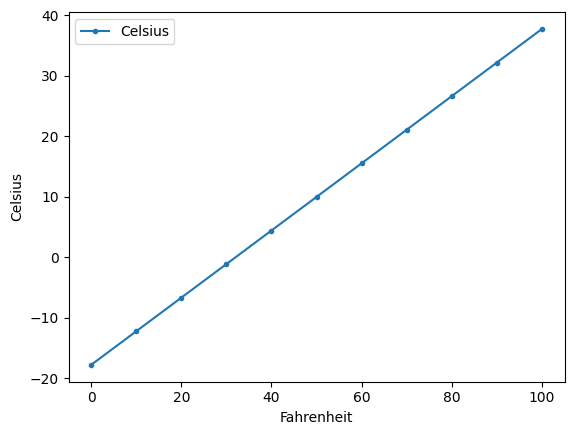

In [2]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [3]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895_2018.csv')

### Section 2 - Data Inspection

In [4]:
print(nyc_df.head())
print(nyc_df.tail())

     Date  Value  Anomaly
0  189501   34.2     -2.4
1  189601   33.2     -3.4
2  189701   34.0     -2.6
3  189801   38.5      1.9
4  189901   34.9     -1.7
       Date  Value  Anomaly
119  201401   35.5     -1.1
120  201501   36.1     -0.5
121  201601   40.8      4.2
122  201701   42.8      6.2
123  201801   38.7      2.1


### Section 3 - Data Cleaning

In [5]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
print(nyc_df.head())

     Date  Temperature  Anomaly
0  189501         34.2     -2.4
1  189601         33.2     -3.4
2  189701         34.0     -2.6
3  189801         38.5      1.9
4  189901         34.9     -1.7


In [6]:
# Checking Date column type
print(nyc_df.Date.dtype)

int64


In [7]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-2.4
1,1896,33.2,-3.4
2,1897,34.0,-2.6


### Section 4 - Descriptive Statistics

In [8]:
# Display precistion to 2 decimal places
pd.set_option('display.precision', 2)

print(nyc_df.Temperature.describe())

count    124.00
mean      36.88
std        4.59
min       25.50
25%       33.83
50%       36.65
75%       39.82
max       47.60
Name: Temperature, dtype: float64


### Section 5 - Build the Model

In [9]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
print(f'Slope: {linear_regression.slope}')
print(f'y-intercept: {linear_regression.intercept}')

Slope: 0.02766136900078678
y-intercept: -17.23882328874901


### Section 6 - Predict

In [10]:
# predicting temp for 2024
print(f'Jan 2024 Highest: {linear_regression.slope * 2024 + linear_regression.intercept}')

Jan 2024 Highest: 38.74778756884343


### Section 7 - Visualizations

Text(0.5, 1.0, 'Avg High Temps in NYC in January')

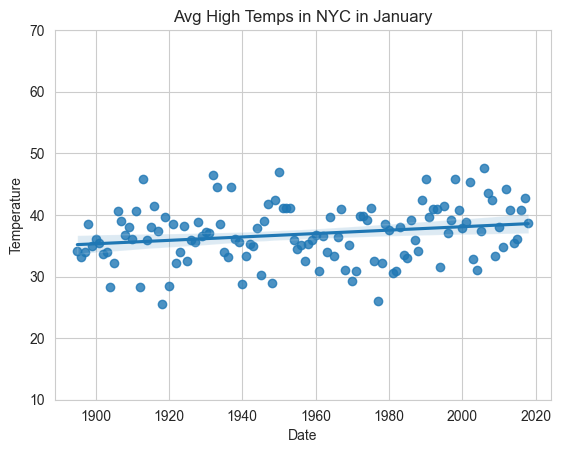

In [11]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)
axes.set_title('Avg High Temps in NYC in January')

## Part 3 - Predict Avg High Temp in NYC in January
The data being used has already been aquired, inspected, and cleaned in Part 2.

### Section 1 - Build the Model

In [12]:
# Split data and set random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11
)
print(X_train.shape)
print(X_test.shape)

(93, 1)
(31, 1)


In [13]:
# Training the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [14]:
# Viewing slope and intercept
print(f'Slope: {linear_regression.coef_}')
print(f'Intercept: {linear_regression.intercept_}')

Slope: [0.0335252]
Intercept: -28.709285569695517


### Section 2 - Test the Model

In [15]:
predicted = linear_regression.predict(X_test)
expected = y_test

# Displays every fifth element
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.27, expected: 31.10
predicted: 38.71, expected: 34.80
predicted: 35.79, expected: 38.20
predicted: 36.23, expected: 44.50
predicted: 37.60, expected: 32.20
predicted: 36.90, expected: 32.60
predicted: 35.69, expected: 38.60


### Section 3 - Predict

In [19]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

print(f'Jan 2024 Highest: {predict(2024)}')

Jan 2024 Highest: [39.14571798]


### Section 4 - Visualizations

Text(0.5, 1.0, 'Avg Highest January Temps in NYC')

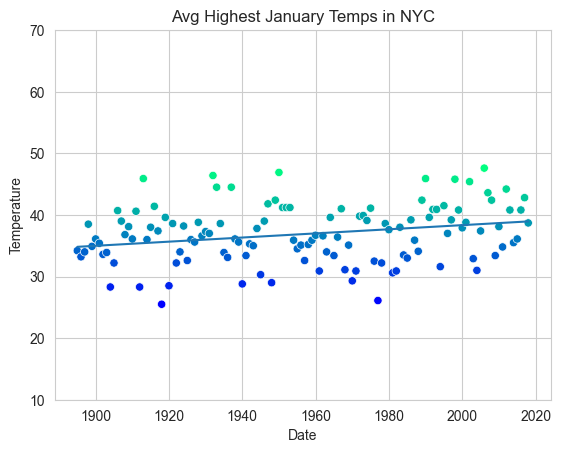

In [18]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)

# plotting the regression line
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)
axes.set_title('Avg Highest January Temps in NYC')

## Part 4 - Adding Insights


After using Simple Linear Regression (SLR) and sklearn estimators, here are some quick observations.
1. The average highest temperature in January for 2024 by both models:
    -  SLR: 38.75
    -  sklearn: 39.15
2. The slope and intercept of each model (number are rounded)
    -  SLR: slope = 0.0277, intercept = -17.239
    -  sklearn: slope = 0.0335, intercept = -28.709

Both models are showing a positive slope and are differing about 0.4 in the predicted 2024 temperatures.

#### SLR vs. sklearn coding complexity
When comparing the complexity of the two models, SLR is easier to code and understand. It will build a regression based off all the data (this takes one line of code). But for Machine Learning, this model does not train part of the data. Sklearn will split the data into training and testing and you can set what percentage of the data is for training and can set a 'random_state' which will help if someone is trying to replicate your analysis. Sklearn is a little more complicated to understand but can handle more complex data relationships.

#### Choosing Models
Depending on what the data set looks like, will help you determine which method to use. For simple and small data sets, SLR will be a better option since it is quick to build the model. Using sklearn, you can determine the accuracy and tune the model before making predictions.
